# Time Series

- What are Time Series?
- Why classical regression techniques fail for forecasting
- Auto Regressive Integrated Moving Average
- Application of Fourier Series Techniques to determine Seasonality & Does Fourier Series Extrapolation Work?







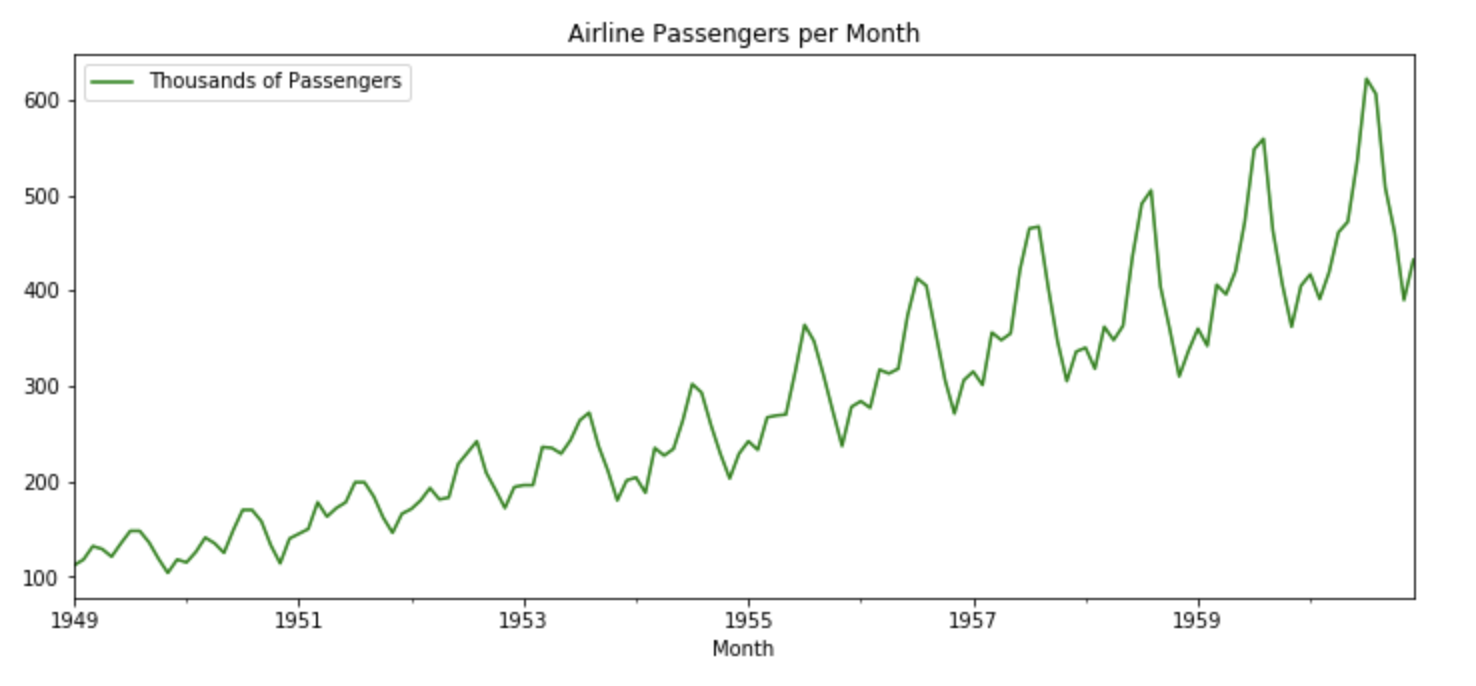




# ETS (Error, Trend, & Seasonality) Decomposition

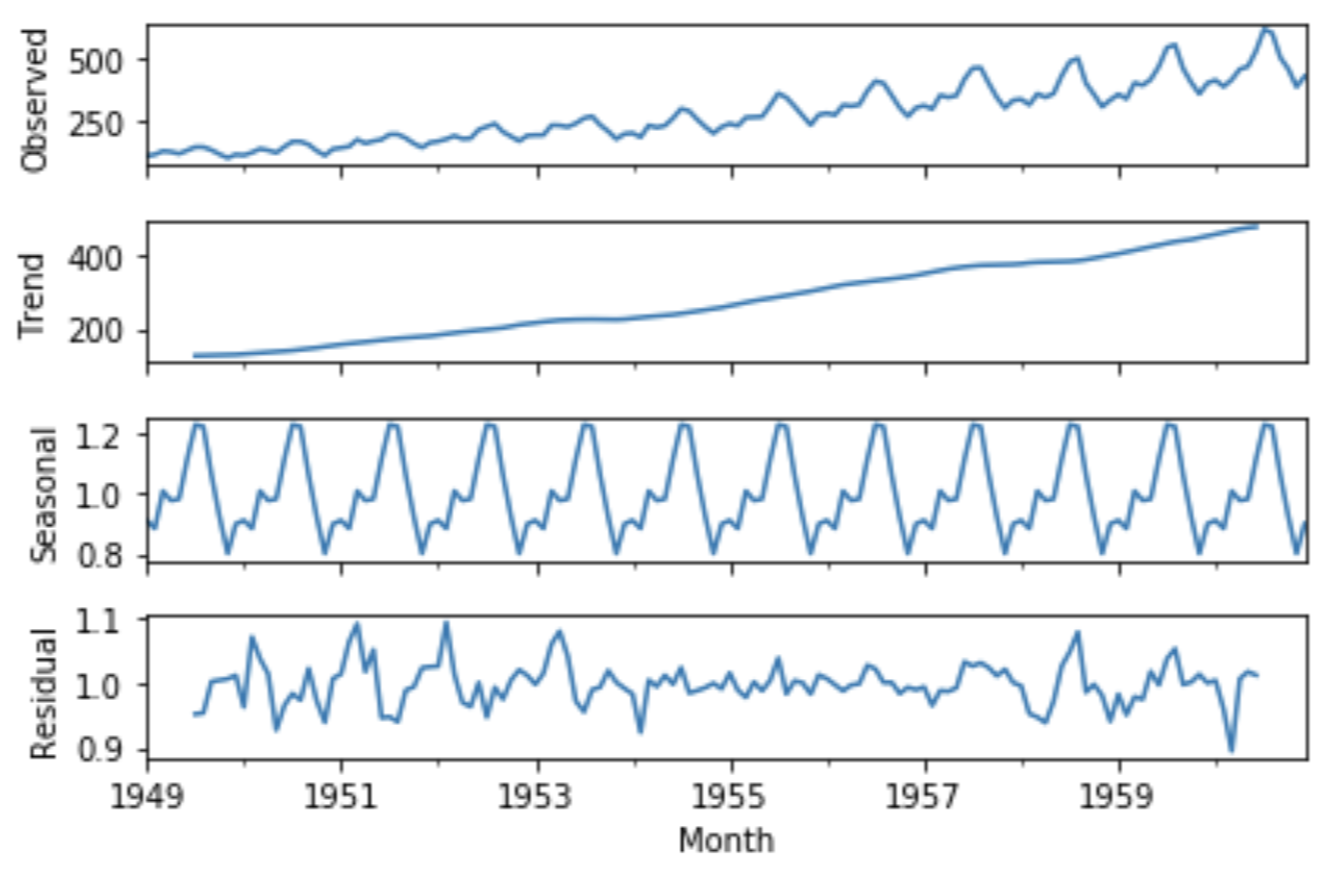

In [142]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t


In [173]:
Fextra = fourierExtrapolation(np.array(rolldf[0:2919]), 730)

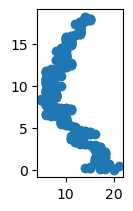

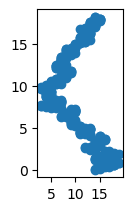

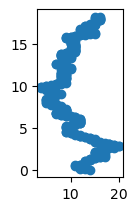

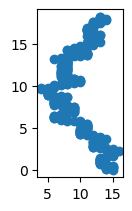

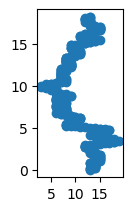

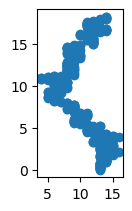

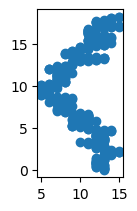

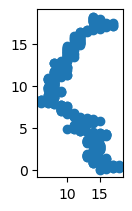

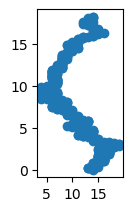

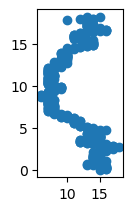

In [38]:
import matplotlib

matplotlib.style.use('default')

x1 = rolly[0:365]

for i in range(365):
    x1[i] = int(x1[i])
    
y1 = np.arange(1,366)/20

plt.subplot(2, 5, 1)
plt.scatter(x1,y1)
plt.show()


x2= rolly[365:730]
for i in range(365):
    x2[i] = int(x2[i])

plt.subplot(2, 5, 2)
plt.scatter(x2,y1)
plt.show()

x3=rolly[730:1095]
for i in range(365):
    x3[i]=int(x3[i])           

plt.subplot(2, 5, 3)
plt.scatter(x3,y1)
plt.show()

x4=rolly[1095:1460]
for i in range(365):
    x4[i]=int(x4[i])           

plt.subplot(2, 5, 4)
plt.scatter(x4,y1)
plt.show()


x5=rolly[1460:1825]
for i in range(365):
    x5[i]=int(x5[i])           

plt.subplot(2,5, 5)
plt.scatter(x5,y1)
plt.show()


x6=rolly[1825:2190]
for i in range(365):
    x6[i]=int(x6[i])           

plt.subplot(2, 5, 6)
plt.scatter(x6,y1)
plt.show()


x7=rolly[2190:2555]
for i in range(365):
    x7[i]=int(x7[i])           

plt.subplot(2, 5, 7)
plt.scatter(x7,y1)
plt.show()


x8=rolly[2555:2920]
for i in range(365):
    x8[i]=int(x8[i])           

plt.subplot(2, 5, 8)
plt.scatter(x8,y1)
plt.show()

x9=rolly[2920:3285]
for i in range(365):
    x9[i]=int(x9[i])           

plt.subplot(2, 5, 9)
plt.scatter(x9,y1)
plt.show()


x10=rolly[3285:3650]
for i in range(365):
    x10[i]=int(x10[i])           

plt.subplot(2, 5, 10)
plt.scatter(x10,y1)
plt.show()


# ARMA & ARIMA (Auto Regressive Integrated Moving Average)
    

AR Model of Order $p$:

$y_t = \beta_1y_{t-1}+\beta_2y_{t-2}+\cdots+\beta_py_{t-p}$

- linear regression model that predicts value of dependent variable based on past p values
- operates under the assumption that past values have an effect on future ones
- commonly used in analyzing time varying processes 


MA Model of Order $q$:

$y_t = \omega+ \varepsilon_t + \alpha_1\varepsilon_{t-1}+\alpha_2\varepsilon_{t-2}+\cdots+\alpha_q\varepsilon_{t-q}$

- predicts value of dependent variable based on past q errors

# ARMA & ARIMA (Auto Regressive Integrated Moving Average)

Non-Stationary Series: Time Series which does not have a constant mean, variance, and autocorrelation

- future values of such series are understadably harder to predict


Integration of Order $d$

- subtraction of the current values of a series with its previous values d times.
- used to transform non-stationary series




ARMA = AR+MA

ARIMA = AR + I + MA

# Auto Correllation Function (ACF) & Partial ACF


ACF:
 - corellation between observations at the current point in time with past observations 
 - can be used to determine optimal MA model order.
 

PACF
 - used to determine optimal AR order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


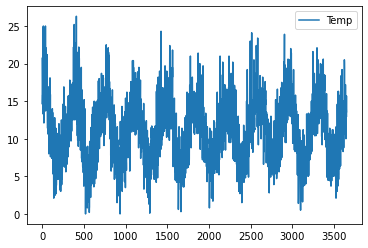

In [152]:
import pandas as pd
df = pd.read_csv('temperatures.csv')
df.info()

df.plot()

#create rolling average of data
df = df['Temp']
rolldf = df.copy()

for i in range(9,3640):
    rolldf[i] = (0.1*(df[i]+df[i+1]+df[i+2]+df[i+3]+df[i+4]+df[i+5]+df[i+6]+df[i+7]+df[i+8]+df[i+9]))


<AxesSubplot:>

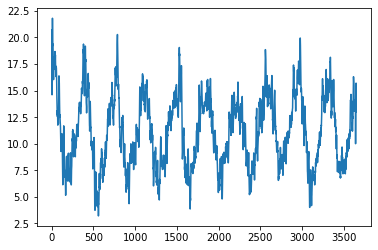

In [72]:
rolldf.plot()

In [140]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS Decomposition
result = seasonal_decompose(rolldf[0:3650], model ='multiplicative', period = 365)

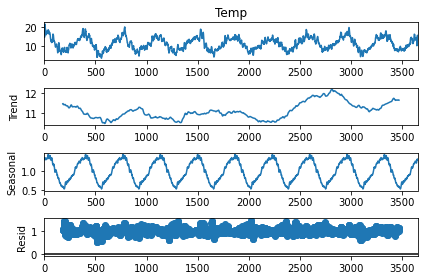

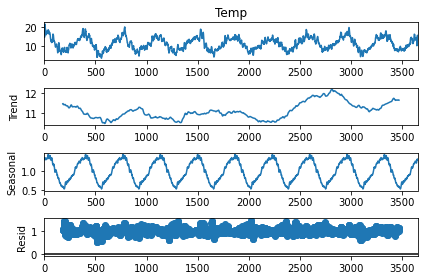

In [141]:
# ETS plot
result.plot()

In [161]:
msk = (rolldf.index < len(rolldf)-730)
rolldf_train = rolldf[msk].copy()
rolldf_test = rolldf[~msk].copy()

C:\Users\Danii\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


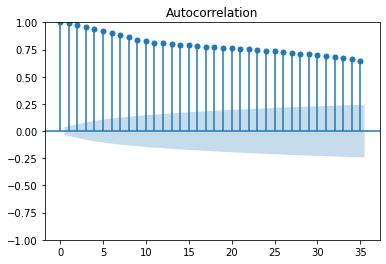

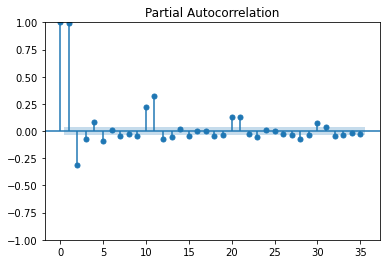

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(rolldf_train)

pacf_original = plot_pacf(rolldf_train)

In [75]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(rolldf_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0031298904943560498


<AxesSubplot:>

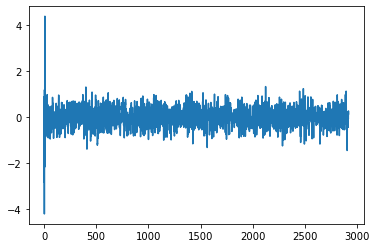

In [76]:
rolldf_train_diff = rolldf_train.diff().dropna()
rolldf_train_diff.plot()

C:\Users\Danii\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


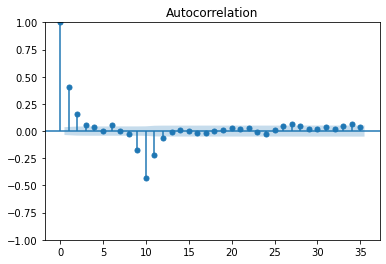

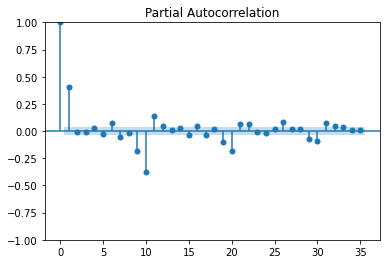

In [77]:
acf_diff = plot_acf(rolldf_train_diff)

pacf_diff = plot_pacf(rolldf_train_diff)

In [162]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(rolldf_train, order=(30,0,10))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Danii\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 2920
Model:               ARIMA(30, 0, 10)   Log Likelihood                -523.401
Date:                Thu, 08 Dec 2022   AIC                           1130.801
Time:                        10:23:38   BIC                           1381.933
Sample:                             0   HQIC                          1221.257
                               - 2920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1251      0.493     22.577      0.000      10.159      12.091
ar.L1          1.2648      0.270      4.692      0.000       0.736       1.793
ar.L2         -0.2705      0.107     -2.538      0.0

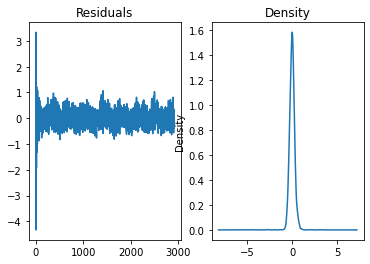

In [163]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

C:\Users\Danii\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


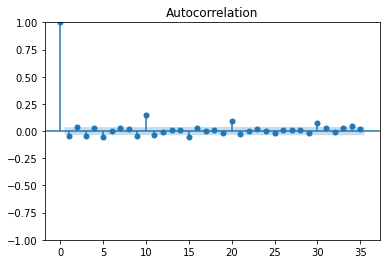

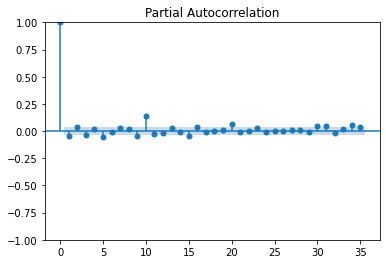

In [164]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

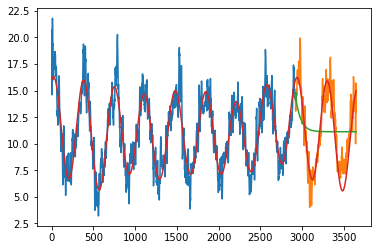

In [174]:
forecast_test = model_fit.forecast(len(rolldf_test))

rolldf_train.plot()
rolldf_test.plot()
forecast_test.plot()
plt.plot(Fextra)

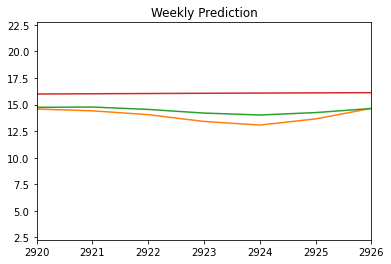

In [175]:
plt.xlim([2920, 2926])
plt.title('Weekly Prediction')
rolldf_train.plot()
rolldf_test.plot()
forecast_test.plot()
plt.plot(Fextra)

C:\Users\Danii\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

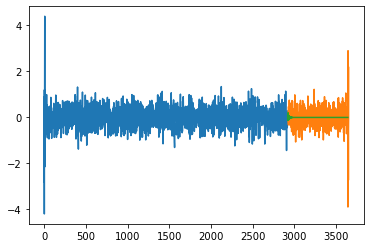

In [136]:
rolldf_test_diff = rolldf_test.diff().dropna()
forecast_test_diff = model_fit.forecast(len(rolldf_test_diff)

rolldf_train_diff.plot()
rolldf_test_diff.plot()
forecast_test_diff.plot()

<AxesSubplot:title={'center':'Weekly Prediction'}>

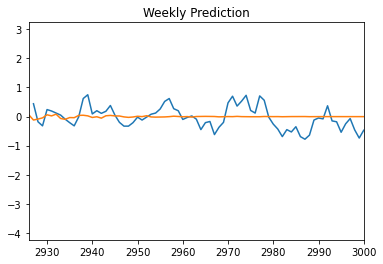

In [137]:


plt.xlim([2926, 3000])
plt.title('Weekly Prediction')
rolldf_test_diff.plot()
forecast_test_diff.plot()